<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173/blob/main/Class_01_6_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

## **Class_01_6:  Pandas and File Handling**

##### **Module I: Getting Started with Python**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Biology, Health and the Environment](https://sciences.utsa.edu/bhe/), [UTSA](https://www.utsa.edu/)

### Module I Material

* Part 1.1: Introduction to Google CoLab
* Part 1.2: Python Basics 1 -- Strings, Variables, Functions
* Part 1.3: Python Basics 3 -- Lists, Dictionaries, Sets and JSON
* Part 1.4: Python Basics 4 -- Conditionals and Loops
* Part 1.5: Python Basics 5 -- Packages, NumPy arrays and Matplotlib
* **Part 1.6: Python Basics 6 -- Pandas and File Handling**

## Google CoLab Instructions

You MUST run the following code cell to get credit for this class lesson. By running this code cell, you will map your GDrive to ```/content/drive``` and print out your Google GMAIL address. Your Instructor will use your GMAIL address to verify the author of this class lesson.

In [ ]:
# You must run this cell first
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: Using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("**WARNING**: Your GMAIL address was **not** printed in the output below.")
    print("**WARNING**: You will NOT receive credit for this lesson.")
    COLAB = False

Mounted at /content/drive
Note: Using Google CoLab
david.senseman@gmail.com


If the code is correct, you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_01/class_01_6_image01A.png)

In order for this lesson to be graded, your GMAIL address must be visible on the last line.

# **Pandas and File Handling**

In this lesson we will focus on the software package **Pandas** and on file handling. These two topics naturally go together since the Pandas package includes a number of file handling methods that are frequently used in Python programming.

## **Pandas**

**_Pandas_** (pronounced as "PAN-daz") is a Python package designed for data manipulation and analysis. It provides data structures and operations for manipulating numerical tables and time series.

Pandas is built on top of the Numpy package and provides a high-level interface for working with data including data selection, cleaning, filtering, aggregation, and visualization.

A central concept in Pandas is the **_DataFrame_**. A Pandas DataFrame is generally the most commonly used Pandas object.

A _DataFrame_ is a two-dimensional labeled data structure with columns of potentially different data types (e.g. integers, floats, and strings). They are very similar to an Excel spreadsheet in which each **_row_** represents a single experimental subject or clinical patient and each **_column_** contains a different experimental or clinical measurement from the subject.


### The Pandas Package

Like other Python packages, Pandas has to be _imported_ into a Python program with the following command before it can be used.

`import pandas as pd`

The normal _alias_ ('nickname') for Pandas is `pd`. When using a method that is part of a Pandas package, the alias `pd` will be used instead of the package name. For example, to use the Pandas `read_csv()` method, the command would be:

`pd.read_csv(filename)`

## **File handling**

**_File handling_** in Python is the process of manipulating files and data stored in a file system. This includes reading and writing files, creating and deleting files, accessing metadata about files, and more.

Python has a variety of built-in functions to help with file handling, such as the `open()` and `close()` functions for opening and closing files, and the `os module` for interacting with the file system. Additionally, there are several third-party libraries that can be used to simplify file handling, such as the Pandas library for working with tabular data.

Files often contain the data that you use to train your AI programs. Once trained, your models may use real-time data to form predictions. These predictions might be made on files too. Regardless of predicting or training, file processing is a vital skill.

There are many different types of files that you must be able to process. The most important file types are listed here:

* **CSV files:** (generally have the .csv extension) hold tabular data that resembles spreadsheet data.
* **Image files:** (generally with the .png or .jpg extension) hold images for computer vision.
* **Text files:** (often have the .txt extension) hold unstructured text and are essential for natural language processing.
* **JSONL** (often have the .json extension) contain semi-structured textual data in a human-readable text-based format.
* **H5:** (can have a wide array of extensions) contain semi-structured textual data in a human-readable text-based format. Keras and TensorFlow store neural networks as H5 files.
* **Audio Files:** (often have an extension such as .au or .wav) contain recorded sound.

Data can come from a variety of sources. In this class, you will obtain data from three primary locations:

* **Your Hard Drive -** This type of data is stored locally, and Python accesses it from a path that looks something like: c:\data\myfile.csv. You will download these files from Canvas as part of the lesson in a compressed (Zip) file.
* **The Internet -** This type of data resides in the cloud and Python accesses it from a URL that looks something like: https://images.pexels.com/photos/9487467/pexels-photo-9487467.jpeg.
* **Google Drive (cloud) -** If your code in Google CoLab, you use GoogleDrive to save and load some data files. CoLab mounts your GoogleDrive into a path similar to the following: /content/drive/My Drive/myfile.csv.



### **File format of Data Files**

Data files can either be **_formatted_** and **_unformatted_**. For example, a Microsoft Word file (.doc or .docx) is a _formatted file_. Microsoft uses a proprietary document format to store MS Word files. If you try to "read" a formated file with a simple text editor like Notepad, you would see something unintelligiblelike this:

![__](https://biologicslab.co/BIO1173/images/class_01/class_01_6_image02A.png)

Most data files used for Machine Learning, including Neural Networks, are _unformatted_ text files. They can be read with any word processor program or even a simple text editor.

For example, the file `iris.txt`, that was included with this lesson, looks like this if you read it with a simple text editor:


~~~text
sepal_l	sepal_w	petal_l	petal_w	 species
5.1     3.5	    1.4	    0.2	     Iris-setosa
4.9	    3.0	    1.4	    0.2	     Iris-setosa
4.7	    3.2	    1.3	    0.2	     Iris-setosa
4.6	    3.1	    1.5	    0.2	     Iris-setosa
5.0	    3.6	    1.4	    0.2	     Iris-setosa
~~~

### **File handling with Pandas**

**_Pandas_** is frequently used in Python programs to read unformated text file. File handling using Pandas typically involves reading in data from a file into a Pandas **_DataFrame_** using the `pd.read_csv(filename)` function. This function can be used to read in data from a variety of sources including CSV files, Excel files, HTML tables, and other formats.

The function's name refers to a particularily common file type called a CSV (Comma Separated Values) file. In this file type, a comma **`,`** is used as the **_delimiter_** value, to **separate** one data value from another.

Here is what you would see if you read the datafile `iris.csv` with a text editor. In this file, each data value is separated by a comma **`,`** from the next value.  

~~~text
sepal_l,sepal_w,petal_l,petal_w,species
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
~~~

While a comma **`,`** is often used a the delimited in data text files, it is certainly not the only character used. Other delimiters include a space ` ` or a tab `\t`.

In order to handle txt files with different delimiters, `pd.read_csv(filename)` can take a second argument called `sep` that defines the separator character to use when reading and processing the text file.

For example, the following command would be used to read a text file that used a space as a delimiter:

`pd.read_csv(filename, sep=' ')`

### Example 1: Read a data file stored on the course HTTPS server

The code in the cell below uses the function `pd.read_csv(filename, sep)` to read the data file `iris.txt` stored on the course HTTPS server [https://biologicslab.co](https://biologicslab.co). As the file is read, it is stored in a Pandas DataFrame called `eg_df`. In the file `iris.txt` a **_tab_** is used as the delimiter. To specify a tab, you use the following: `\t`.

When reading text files with `pd.read_csv()`, it is _always_ a good idea to print out the first 5 rows of data to make sure the read was successful. One way to do this is with the Pandas method `head()` as demonstrated in the example below.

**NOTE:** We will often name the DataFrame used for the Example as `eg_df` and the DataFrame used for the Exercises as `ex_df`.

In [ ]:
# Example 1: Use pd.read_csv to read a file on the hard drive

import pandas as pd

# Read data file using Pandas read_csv() function
eg_df = pd.read_csv("https://biologicslab.co/BIO1173/data/iris.txt",
                  sep='\t',  # define the separator as a tab
                  na_values=["?", "NA", "null", ""])

# Set display options
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 9)

# Print out the first 5 records using the head() method
eg_df.head()

sepal_l  sepal_w  petal_l  petal_w      species
0      5.1      3.5      1.4      0.2  Iris-setosa
1      4.9      3.0      1.4      0.2  Iris-setosa
2      4.7      3.2      1.3      0.2  Iris-setosa
3      4.6      3.1      1.5      0.2  Iris-setosa
4      5.0      3.6      1.4      0.2  Iris-setosa

If the code is correct, you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_01/class_01_6_image03A.png)


### **Exercise 1: Read a data file stored on the course HTTPS server**

In the cell below, use the Pandas `pd.read_csv(filename, sep)` function to read the data file `Pima.txt` on your hard drive and store the data in a new data frame called `ex_df`. Use the `head()` method to print out the first 5 records in `ex_df`. The deliminter in this file a `comma`.

In [ ]:
### Insert your code for Exercise 1 here


import pandas as pd

# Read data file using Pandas read_csv() function
ex_df = pd.read_csv("https://biologicslab.co/BIO1173/data/Pima.txt",
                  sep=',',  # define the separator as a tab
                  na_values=["?", "NA", "null", ""])

# Set display options
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 9)

# Print out the first 5 records using the head() method
ex_df.head()


npreg  glu  bp  skin   bmi    ped  age type
0      5   86  68    28  30.2  0.364   24   No
1      7  195  70    33  25.1  0.163   55  Yes
2      5   77  82    41  35.8  0.156   35   No
3      0  165  76    43  47.9  0.259   26   No
4      0  107  60    25  26.4  0.133   23   No

If your code is correct you should see the following output:

![__](https://biologicslab.co/BIO1173/images/class_01/class_01_6_image05A.png)

However, if you used the **wrong** delimiter, you will see this instead.

![__](https://biologicslab.co/BIO1173/images/class_01/class_01_6_image04A.png)

If you see the second image, you need to change the value of the delimiter to a `comma` **`,`**

You **must** correct your mistake before you continue or your later code will be incorrect.

### Example 2: Use the Pandas `display()` function.

Similar to the `head()` function, the Pandas `display()` function is another convenient way to view data in a DataFrame. It is used to quickly display the contents of a DataFrame especially in an interactive environments such as JupyterLab. It is quite useful for quickly analyzing data and it allows the user to have more control over the way the data is displayed.

The code in the cell below shows how to use this method with the Iris data stores in `eg_df`. Since the `display()` function allows you to control the maximum rows and columns to show, it can provide a cleaner display than merely printing a DataFrame with many columns and/or rows that using the `head()` method.

In [ ]:
# Example 2: Use Pandas display

import pandas as pd

# Set max columns and max rows
pd.set_option('display.max_columns', 4)
pd.set_option('display.max_rows', 6)

# Display 4 columns and 6 rows
display(eg_df)

sepal_l  sepal_w  ...  petal_w         species
0        5.1      3.5  ...      0.2     Iris-setosa
1        4.9      3.0  ...      0.2     Iris-setosa
2        4.7      3.2  ...      0.2     Iris-setosa
..       ...      ...  ...      ...             ...
147      6.5      3.0  ...      2.0  Iris-virginica
148      6.2      3.4  ...      2.3  Iris-virginica
149      5.9      3.0  ...      1.8  Iris-virginica

[150 rows x 5 columns]

If the code is correct you should see the following table:

![____](https://biologicslab.co/BIO1173/images/class_01/class_01_6_image03B.png)

### **Exercise 2: Use the Pandas display() function.**

In the cell below, use the Pandas `display()` function to print a maximum of 8 columns and 8 rows of the DataFrame `ex_df`.   

In [ ]:
# Insert your code for Exercise 2 here


import pandas as pd

# Set max columns and max rows
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 8)

# Display 4 columns and 6 rows
display(ex_df)

npreg  glu  bp  skin   bmi    ped  age type
0        5   86  68    28  30.2  0.364   24   No
1        7  195  70    33  25.1  0.163   55  Yes
2        5   77  82    41  35.8  0.156   35   No
3        0  165  76    43  47.9  0.259   26   No
..     ...  ...  ..   ...   ...    ...  ...  ...
196      7  129  68    49  38.5  0.439   43  Yes
197      0  106  70    37  39.4  0.605   22   No
198      1  118  58    36  33.3  0.261   23   No
199      8  155  62    26  34.0  0.543   46  Yes

[200 rows x 8 columns]

If your code is correct you should see the following output:

![__](https://biologicslab.co/BIO1173/images/class_01/class_01_6_image04B.png)

However, if you used the **wrong** delimiter in **Exercise 2**, you will see this instead.

![__](https://biologicslab.co/BIO1173/images/class_01/class_01_6_image08A.png)

### **If you see the wrong display --STOP**

The reason that you are seeing the wrong display is that you still haven't changed the delimiter value in **Exercise 2**. Go back to **Exercise 2** and change the delimiter to be a comma `sep=','` and then **_re-run_** the Exercise 2 code cell.


### Example 3: Use the Pandas `describe()` method.

With any new dataset, it is generally useful to get a quick, overall view of dataset's contents using the Pandas `describe()` method.  

The `descibe()` method returns an variety of summary statistics about the data, including the count, mean, standard deviation, minimum, maximum, and first and third quartiles. It also includes a count of the number of non-null values, and the percent of the data that is missing. This information can be used to get a better understanding of the data and its distributions.

The code in the cell below shows how to use this method with the Iris data stores in `eg_df`.

In [ ]:
# Example 3: Use describe() method to print summary statistics

import pandas as pd

# Set max columns and max rows
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 8)

# Describe() method with eg_df
eg_df.describe()

sepal_l     sepal_w     petal_l     petal_w
count  150.000000  150.000000  150.000000  149.000000
mean     5.843333    3.057333    3.758000    1.195302
std      0.828066    0.435866    1.765298    0.763202
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000

If the code is correct you should see the following table:

![__](https://biologicslab.co/BIO1173/images/class_01/class_01_6_image09A.png)

One thing to notice is that the **count** values are not the same for all the columns. In particular, the count for the column `petal_w` is `149`, while the count for all the other columns is `150`.

The `describe()` method excludes any `NA` or missing values which suggests that there is a missing value in the `petal_w` column.

### **Exercise 3: Use the Pandas `describe()` method.**

In the cell below, use the Pandas `describe()` method to print the summary statistics of the data in `ex_df`.  

In [ ]:
# Insert your code for Exercise 3 here

import pandas as pd

# Set max columns and max rows
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 8)

# Describe() method with eg_df
ex_df.describe()


npreg         glu          bp        skin         bmi         ped  \
count  200.000000  200.000000  200.000000  200.000000  199.000000  200.000000   
mean     3.570000  123.970000   71.260000   29.215000   32.319598    0.460765   
std      3.366268   31.667225   11.479604   11.724594    6.144166    0.307225   
min      0.000000   56.000000   38.000000    7.000000   18.200000    0.085000   
25%      1.000000  100.000000   64.000000   20.750000   27.550000    0.253500   
50%      2.000000  120.500000   70.000000   29.000000   32.800000    0.372500   
75%      6.000000  144.000000   78.000000   36.000000   36.500000    0.616000   
max     14.000000  199.000000  110.000000   99.000000   47.900000    2.288000   

              age  
count  200.000000  
mean    32.110000  
std     10.975436  
min     21.000000  
25%     23.000000  
50%     28.000000  
75%     39.250000  
max     63.000000

If your code is correct you should see the following output:

![__](https://biologicslab.co/BIO1173/images/class_01/class_01_6_image10A.png)

Look at the **count** values to see if there are any missing data.

--------------------

## **Missing Values**

Missing values are a reality of machine learning.  Ideally, every row of data will have values for all columns.  However, this is rarely the case. Replacing missing values is important in machine learning they can cause problems with the model's accuracy and can lead to incorrect predictions. It is up to you to **_clean your data_**  

There are a few different ways to deal with missing data. You could simply delete any record (i.e. the entire row) if it contained one (or more) missing value(s). This may or may not be reasonable depending up the data set and the number of missing values in it.

An alternative approach is to replace missing value(s) with the **_median value_** for that column. Here is the Wiki page for the program that calculates the [median](https://en.wikipedia.org/wiki/Median).  

---------------------

### Example 4: Use `df.isnull()` to Find Missing Values.

When working with a new dataset you should perform a quick check for any missing values. The example below, the Pandas method `df.isnull()` to locate any missing values in the `eg_df` DataFrame.

In [ ]:
# Example 4: Use `df.isnull()` method to find missing values

import pandas as pd

# Identify whether each column contains missing values
missing_locations = eg_df.isnull().any()

# Create a DataFrame that pairs column names with the missing‑flag
eg_summary_df = pd.DataFrame({
    'column_name': eg_df.columns,
    'has_missing': missing_locations
})

print(eg_summary_df.to_string(index=False))

column_name  has_missing
    sepal_l        False
    sepal_w        False
    petal_l        False
    petal_w         True
    species        False


If the code is correct you should see the following output:

![__](https://biologicslab.co/BIO1173/images/class_01/class_01_6_image01B.png)

The output says there is at least one (and possibly more) missing values in the column `petal_w`.

### **Exercise 4: Use the Pandas `isnull()` method to find missing values.**

In the cell below, use the `df.isnull()` method to locate any missing values in your DataFrame `ex_df`.  

In [ ]:
# Insert your code for Exercise 4 here

import pandas as pd

# Identify whether each column contains missing values
missing_locations = ex_df.isnull().any()

# Create a DataFrame that pairs column names with the missing‑flag
ex_summary_df = pd.DataFrame({
    'column_name': ex_df.columns,
    'has_missing': missing_locations
})

print(ex_summary_df.to_string(index=False))


column_name  has_missing
      npreg        False
        glu        False
         bp        False
       skin        False
        bmi         True
        ped        False
        age        False
       type        False


If your code is correct you should see something _similar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_01/class_01_6_image05B.png)

The output reports that there is at least one and possibly more missing values in the column `bmi`.

### Example 5: Use `df.fillna()` to Replace Missing Values

Now that the location of the missing value(s) has been determined, the Pandas method `df.fillna()` can now be use to replace the missing values.  

The first step is to compute the `median` value for the column using the Pandas method `median()`. The next step is to use `df.fillna()` to replace any missing values in the `petal_w` column with the column's median value. Finally, we check once more for any missing values.

In [ ]:
# Example 5: Use df.fillna() Method to replace missing values

import pandas as pd

# ------------------------------------------------------------------------
# 1️⃣  Define the column name that is missing data
# ------------------------------------------------------------------------
col_name_missing_data = 'petal_w'

# ------------------------------------------------------------------------
# 2️⃣  Pick the column that contains missing values
# ------------------------------------------------------------------------
if col_name_missing_data not in eg_df.columns:
    raise ValueError(f"Column '{col_name_missing_data}' not found!")

print(f"\nColumn with missing data is {col_name_missing_data}")

# ------------------------------------------------------------------------
# 3️⃣  Compute the median (ignoring NaNs by default)
# ------------------------------------------------------------------------
missing_val_med = eg_df[col_name_missing_data].median()
print(f"The median value of the missing datapoint = {missing_val_med:.4f}.")
print(f"Replacing missing values with {missing_val_med:.4f}.\n")

# ------------------------------------------------------------------------
# 4️⃣   Fill the NaNs
# ------------------------------------------------------------------------
eg_df[col_name_missing_data] = eg_df[col_name_missing_data].fillna(missing_val_med)

# ------------------------------------------------------------------------
# 5️⃣  Verify no more missing values in that column
# ------------------------------------------------------------------------
missing_locations = eg_df.isnull().any()
summary_df = pd.DataFrame({
    'column_name': eg_df.columns,
    'has_missing': missing_locations
})

# ------------------------------------------------------------------------
# 6️⃣  Print summary
# ------------------------------------------------------------------------
print("\nAfter filling, check which columns still contain missing values:")
print(summary_df.to_string(index=False))



Column with missing data is petal_w
The median value of the missing datapoint = 1.3000.
Replacing missing values with 1.3000.


After filling, check which columns still contain missing values:
column_name  has_missing
    sepal_l        False
    sepal_w        False
    petal_l        False
    petal_w        False
    species        False


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_01/class_01_6_image02B.png)

The output says there are no longer any missing values in any column.

### **Exercise 5: Use the Pandas `fillna()` method to replace missing values**

In the cell below, use the Pandas method fillna() to replace the missing values in the column `bmi`.

Make sure to compute the median value for the `bmi` column using the Pandas method median(). Then use the Pandas method fillna() to replace any missing values in the `bmi` column with the median value. Finally, check once more for any missing values. values in `ex_df`.  

In [ ]:
# Insert your code for Exercise 5 here

import pandas as pd

# ------------------------------------------------------------------------
# 1️⃣  Define the column name that is missing data
# ------------------------------------------------------------------------
col_name_missing_data = 'bmi'

# ------------------------------------------------------------------------
# 2️⃣  Pick the column that contains missing values
# ------------------------------------------------------------------------
if col_name_missing_data not in ex_df.columns:
    raise ValueError(f"Column '{col_name_missing_data}' not found!")

print(f"\nColumn with missing data is {col_name_missing_data}")

# ------------------------------------------------------------------------
# 3️⃣  Compute the median (ignoring NaNs by default)
# ------------------------------------------------------------------------
missing_val_med = ex_df[col_name_missing_data].median()
print(f"The median value of the missing datapoint = {missing_val_med:.4f}.")
print(f"Replacing missing values with {missing_val_med:.4f}.\n")

# ------------------------------------------------------------------------
# 4️⃣   Fill the NaNs
# ------------------------------------------------------------------------
ex_df[col_name_missing_data] = ex_df[col_name_missing_data].fillna(missing_val_med)

# ------------------------------------------------------------------------
# 5️⃣  Verify no more missing values in that column
# ------------------------------------------------------------------------
missing_locations = ex_df.isnull().any()
summary_df = pd.DataFrame({
    'column_name': ex_df.columns,
    'has_missing': missing_locations
})

# ------------------------------------------------------------------------
# 6️⃣  Print summary
# ------------------------------------------------------------------------
print("\nAfter filling, check which columns still contain missing values:")
print(summary_df.to_string(index=False))



Column with missing data is bmi
The median value of the missing datapoint = 32.8000.
Replacing missing values with 32.8000.


After filling, check which columns still contain missing values:
column_name  has_missing
      npreg        False
        glu        False
         bp        False
       skin        False
        bmi        False
        ped        False
        age        False
       type        False


If your code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_01/class_01_6_image06B.png)

The output above reports that there are no more missing values in any column.

### Example 6: Use the Pandas `copy()` method to create a copy of a data frame.

The Pandas `df.copy()` method is used to create a **_shallow copy_** of a DataFrame. A shallow copy of a DataFrame is a copy that does _not_ contain a deep copy of the objects or data within the DataFrame. Instead, it creates a new object with references to the objects or data in the original DataFrame. In other words, if the original DataFrame is changed, the shallow copy will **_not_** be affected.  

You might want to use a shallow copy of a DataFrame when you need to make changes to the DataFrame without affecting the original data. Shallow copies are often used when you need to make temporary changes to DataFrame and then revert back to the original.

The code in the cell below creates a shallow copy of the DataFrame `eg_df` called `eg_df_copy` and then prints out the first 5 records.

In [ ]:
# Example 6: Use the `copy()` method to make a shallow copy

import pandas as pd

# Make shallow copy
eg_df_copy = eg_df.copy()

# Show the first records in the copy
eg_df_copy.head()

sepal_l  sepal_w  petal_l  petal_w      species
0      5.1      3.5      1.4      0.2  Iris-setosa
1      4.9      3.0      1.4      0.2  Iris-setosa
2      4.7      3.2      1.3      0.2  Iris-setosa
3      4.6      3.1      1.5      0.2  Iris-setosa
4      5.0      3.6      1.4      0.2  Iris-setosa

If the code is correct you should see the following table:

![__](https://biologicslab.co/BIO1173/images/class_01/class_01_6_image15A.png)

### **Exercise 6: Use the Pandas `copy()` method to create a copy of a data frame**.

In the cell below write the code to create a shallow copy of the DataFrame `ex_df`. Call your copy `ex_df_copy`. Print out the first 5 records in `ex_df_copy` using the `head()` method.

In [ ]:
# Insert your code for Exercise 6 here

import pandas as pd

# Make shallow copy
ex_df_copy = ex_df.copy()

# Show the first records in the copy
ex_df_copy.head()

npreg  glu  bp  skin   bmi    ped  age type
0      5   86  68    28  30.2  0.364   24   No
1      7  195  70    33  25.1  0.163   55  Yes
2      5   77  82    41  35.8  0.156   35   No
3      0  165  76    43  47.9  0.259   26   No
4      0  107  60    25  26.4  0.133   23   No

If your code is correct you should see the following table:

![__](https://biologicslab.co/BIO1173/images/class_01/class_01_6_image16A.png)

## **Dropping field in a Pandas DataFrame**

**Dropping a field** in a Pandas DataFrame is a way of removing a column from the dataset. This can be done using the Panda `drop()` method, which takes the label of the column that you want to remove. You may want to do this if the field is irrelevant to the analysis you are performing, or if it contains redundant information. For example, you will need to drop fields that are of no value to the training of a neural network.

### Example 7: Use `df.drop()` Method to Drop a Field

The code in the cell below uses the Pandas `drop()` method to drop the field `species` from the Iris data set. To preserve the original data, the `drop()` method will be used with the shallow copy of the DataFrame that was created in **Example 6**.

In [ ]:
# Example 7: Use `df.drop()` method to drop a field

import pandas as pd

# ------------------------------------------------------------------------
# 1️⃣  Define the column(s) to drop
# ------------------------------------------------------------------------
column_to_drop = 'species'

# ------------------------------------------------------------------------
# 2️⃣  Show the columns *before* the drop
# ------------------------------------------------------------------------
print(f"Before drop: {list(eg_df_copy.columns)}")

# ------------------------------------------------------------------------
# 3️⃣  Drop the column(s)
# ------------------------------------------------------------------------
eg_df_copy.drop(columns=[column_to_drop], inplace=True)

# ------------------------------------------------------------------------
# 4️⃣   Show the columns *after* the drop
# ------------------------------------------------------------------------
print(f"After drop: {list(eg_df_copy.columns)}")


Before drop: ['sepal_l', 'sepal_w', 'petal_l', 'petal_w', 'species']
After drop: ['sepal_l', 'sepal_w', 'petal_l', 'petal_w']


If the code is correct your should see the follwoing output

![__](https://biologicslab.co/BIO1173/images/class_01/class_01_6_image17A.png)

However, if you see the following error:

~~~text
KeyError: "['species'] not found in axis"
~~~

it probably means that you have run the example already so that `eg_df_copy` no longer contains the column `species`. This is one reason to make a backup copy when you are making changes to a data frame.

### **Exercise 7: Use the Pandas `drop()` method to drop a field in a DataFrame.**

In the cell below use the Pandas `drop()` method to drop the `type` column from the **_copy_** of the Pima data stored in `ex_df_copy`. Print the column names before and after dropping the column.

In [ ]:
# Insert your code for Exercise 7 here

import pandas as pd

# ------------------------------------------------------------------------
# 1️⃣  Define the column(s) to drop
# ------------------------------------------------------------------------
column_to_drop = 'type'

# ------------------------------------------------------------------------
# 2️⃣  Show the columns *before* the drop
# ------------------------------------------------------------------------
print(f"Before drop: {list(ex_df_copy.columns)}")

# ------------------------------------------------------------------------
# 3️⃣  Drop the column(s)
# ------------------------------------------------------------------------
ex_df_copy.drop(columns=[column_to_drop], inplace=True)

# ------------------------------------------------------------------------
# 4️⃣   Show the columns *after* the drop
# ------------------------------------------------------------------------
print(f"After drop: {list(ex_df_copy.columns)}")


Before drop: ['npreg', 'glu', 'bp', 'skin', 'bmi', 'ped', 'age', 'type']
After drop: ['npreg', 'glu', 'bp', 'skin', 'bmi', 'ped', 'age']


If your code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_01/class_01_6_image18A.png)

However, if you see the following error:

~~~text
KeyError: "['type'] not found in axis"
~~~

it probably means that you have run the example already so that `df2_copy` no longer contains the column `type`. To get rid of this errow you will need to re-run **Exercise 6** to create a new copy of `df2_copy` and then re-run **Exercise 7** using the new copy.

### Example 8: Use Pandas `map()` method to map strings to integer values

Mapping string values to integer values can be important when using certain machine learning models. Some machine learning algorithms do not work well with string values, so they must be converted to integer values. This is done by assigning a unique number to each distinct string value. This helps the machine learning algorithm to recognize patterns in the data and make more accurate predictions.

In this example, the column `species` in the Iris flower data set will have the following string values mapped to the following integers:

* Iris-setosa: mapped to the value 0
* Iris-versicolor: mapped to the value 1
* Iris-virginica: mapped to the value 2

using the Pandas `map()` method.

The code starts by making a new, shallow copy of the `eg_df` data frame, called `eg_df_copy`, for the remapping. This keeps intact the original Iris data stored in `eg_df`.

The code then set the display options so that the values of the `species` column can be more easily observed. Many data sets used in machine learning can have too many columns as well as too many rows to easily display in a Jupyter Lab notebook.

To verify that the mapping worked as expected, the contents of the `df_copy` data frame are printed out before, and after, the mapping using the `display()` function.


In [ ]:
# Example 8: Map strings to integers

import pandas as pd

# Make a new copy of eg_df
eg_df_copy = eg_df.copy()

# Set max columns and max rows
pd.set_option('display.max_columns', 4)
pd.set_option('display.max_rows', 6)

# Describe() method with df2
print("Iris data before mapping:")
display(eg_df_copy)

# Define the mapping dictionary
mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica' :2}

# Map the integer column to strings
eg_df_copy['species'] = eg_df_copy['species'].map(mapping)

print("Iris data after mapping:")
display(eg_df_copy)

Iris data before mapping:


sepal_l  sepal_w  ...  petal_w         species
0        5.1      3.5  ...      0.2     Iris-setosa
1        4.9      3.0  ...      0.2     Iris-setosa
2        4.7      3.2  ...      0.2     Iris-setosa
..       ...      ...  ...      ...             ...
147      6.5      3.0  ...      2.0  Iris-virginica
148      6.2      3.4  ...      2.3  Iris-virginica
149      5.9      3.0  ...      1.8  Iris-virginica

[150 rows x 5 columns]

Iris data after mapping:


sepal_l  sepal_w  ...  petal_w  species
0        5.1      3.5  ...      0.2        0
1        4.9      3.0  ...      0.2        0
2        4.7      3.2  ...      0.2        0
..       ...      ...  ...      ...      ...
147      6.5      3.0  ...      2.0        2
148      6.2      3.4  ...      2.3        2
149      5.9      3.0  ...      1.8        2

[150 rows x 5 columns]

If your code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_01/class_01_6_image19A.png)

You should notice that the species names have been converted in `0` for Iris-setosa and `2` for Iris-virginica, in the `species` column.

### **Exercise 8: Use Pandas `map()` method to map strings to integer values**

In the cell below, use the Pandas `map()` method to map string values in the column `type` from `No` to 0, and `Yes` to 1.

Start by making a new copy of `ex_df` and call it `ex_df_copy`. Perform the mapping on the `ex_df_copy` data frame. As in **Example 8**, use the Pandas `display()` function to print out 4 columns and 6 row of `ex_df_copy` before and after the mapping. Don't forget to change the name of the data to `Pima`.

In [ ]:
# Insert your code for Exercise 8 here

import pandas as pd

# Make a new copy of eg_df
ex_df_copy = ex_df.copy()

# Set max columns and max rows
pd.set_option('display.max_columns', 4)
pd.set_option('display.max_rows', 6)

# Describe() method with df2
print("Pima data before mapping:")
display(ex_df_copy)

# Define the mapping dictionary
mapping = {'No': 0, 'Yes': 1}

# Map the integer column to strings
ex_df_copy['type'] = ex_df_copy['type'].map(mapping)

print("Pima data after mapping:")
display(ex_df_copy)

Pima data before mapping:


npreg  glu  ...  age  type
0        5   86  ...   24    No
1        7  195  ...   55   Yes
2        5   77  ...   35    No
..     ...  ...  ...  ...   ...
197      0  106  ...   22    No
198      1  118  ...   23    No
199      8  155  ...   46   Yes

[200 rows x 8 columns]

Pima data after mapping:


npreg  glu  ...  age  type
0        5   86  ...   24     0
1        7  195  ...   55     1
2        5   77  ...   35     0
..     ...  ...  ...  ...   ...
197      0  106  ...   22     0
198      1  118  ...   23     0
199      8  155  ...   46     1

[200 rows x 8 columns]

If your code is correct you should see the following output:

![__](https://biologicslab.co/BIO1173/images/class_01/class_01_6_image20A.png)

The output above shows that the string values, `Yes` and `No` in the `type` column have been converted to the integer values `0` and `1` respectively.

## **Convert Pandas DataFrame to a Numpy Array**

Pandas has a built-in function called `to_numpy()` which can be used to convert a Pandas DataFrame or series to Numpy array. This can be useful for manipulating or plotting data using Numpy functions.

The `to_numpy()` function takes no arguments and returns a Numpy array containing the data from the Pandas DataFrame or series.

### Example 9: Use Pandas `to_numpy()` method to convert a DataFrame into Numpy array

The code in the cell below uses the `to_numpy()` method to covert the Iris data stored in the `eg_df` DataFrame, into a Numpy array called `eg_ar`. It then uses square bracket indexing to print out the first 5 rows of the new Numpy array.

In [ ]:
# Example 9: Convert data frame to numpy array

import pandas as pd
import numpy as np

# Use the to_numpy method
eg_ar = eg_df.to_numpy()

# Print the first 5 rows of the numpy array
print(eg_ar[ :5, ])


[[5.1 3.5 1.4 0.2 'Iris-setosa']
 [4.9 3.0 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.3 0.2 'Iris-setosa']
 [4.6 3.1 1.5 0.2 'Iris-setosa']
 [5.0 3.6 1.4 0.2 'Iris-setosa']]


If your code is correct you should see the following output:

![__](https://biologicslab.co/BIO1173/images/class_01/class_01_6_image21A.png)

You should notice that the `df.to_numpy()` converted both the numerical values as well as the strings in the `species` column into the new `Numpy` array `eg_ar`.  

While arrays generally contain the same data type (e.g. all numbers or all strings), `Numpy` arrays can contain both data types. Nevertheless, keep in mind that `Numpy` arrays are very different than `DataFrames`.

### **Exercise 9: Use Pandas `to_numpy()` method to convert a DataFrame into Numpy array**

In the cell below, use the Pandas `df.to_numpy()` method to convert the Pima data stored in `ex_df` into a new Numpy array called `ex_ar`. Print out the first 10 rows.


In [ ]:
# Insert your code for Exercise 9 here

# Example 9: Convert data frame to numpy array

import pandas as pd
import numpy as np

# Use the to_numpy method
ex_ar = ex_df.to_numpy()

# Print the first 5 rows of the numpy array
print(ex_ar[ :5, ])

[[5 86 68 28 30.2 0.364 24 'No']
 [7 195 70 33 25.1 0.163 55 'Yes']
 [5 77 82 41 35.8 0.156 35 'No']
 [0 165 76 43 47.9 0.259 26 'No']
 [0 107 60 25 26.4 0.133 23 'No']]


If your code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_01/class_01_6_image22A.png)

You should notice that when you generate a `Numpy` array, you lose the column headers (titles) that are present in the `DataFrame`. You also lose the sequential index values at the left.

### Example 10: Download an read a text file, line-by-line

Reading very large text files can be challenging, especially with a laptop computer. One approach is to use a **_streaming method_**, which only reads data from the file, one line at a time, instead of the entire file. For example, you might only want to work on a small part of a large file. Reading the file, line-by-line, would allow you to process only the data you need without overflowing your laptop's memory by reading the entire huge file.

For convience, the example below only downloads a **_small_** textfile from the website [Textfiles.com](Textfile.com) called _The Utimate Turning Test_. The textfile was written by David Barberi at the University of North Carolina (UNC) back in 1992.

Again, what is important about this example is **_how_** the textfile is being processed **_line-by-line_**. You can use the same code if you need to handle a huge textfile without overflowing your laptop's memory.

In [ ]:
# Example 10: Download and read a textfile line-by-line

import urllib.request
import codecs

# Specify the url for the textfile
url = "http://textfiles.com/programming/AI/thexvirt.tes"

# Use a while loop to read the textfile line-by-line
with urllib.request.urlopen(url) as urlstream:
    for line in codecs.iterdecode(urlstream, 'utf-8'):
        print(line.rstrip())  # print each line as it is read.


---------------------------------------------------------
The Ultimate Turing Test
Rought Draft #1
(c) copyright 1992 by David Barberi
dbarberi@sunsite.unc.edu
---------------------------------------------------------




     What is the ultimate Turing Test?
     In 1950 Alan Turing published his now famous paper
"Computing Machinery and Intelligence."  In that paper he
describes a method for humans to test AI programs.  In its most
basic form, a human judge sits at a computer terminal and
interacts with the subject by written communication only.  The
judge decide if the subject on the other end of the computer link
is a human or an AI program imitating a human.
     Can Turings test be improved on?  Yes.  With current
advances in computer graphics, virtual reality, biomechanics and
many other fields, it is possible to create an "Enhanced" or
"Virtual" Turing test.  The underlying idea of the test is still
the same, but the amount of interaction between judge and subject
is increased

### **Exercise 10: Download an read a text file line-by-line**

Use the code example in **Example 10** to download and print the textfile, line-by-line, that is located at:

"https://data.heatonresearch.com/data/t81-558/datasets/sonnet_18.txt"

In [ ]:
# Insert your code for Exercise 10 here

import urllib.request
import codecs

# Specify the url for the textfile
url = "https://data.heatonresearch.com/data/t81-558/datasets/sonnet_18.txt"

# Use a while loop to read the textfile line-by-line
with urllib.request.urlopen(url) as urlstream:
    for line in codecs.iterdecode(urlstream, 'utf-8'):
        print(line.rstrip())  # print each line as it is read.

Sonnet 18 original text
William Shakespeare

Shall I compare thee to a summer's day?
Thou art more lovely and more temperate:
Rough winds do shake the darling buds of May,
And summer's lease hath all too short a date:
Sometime too hot the eye of heaven shines,
And often is his gold complexion dimm'd;
And every fair from fair sometime declines,
By chance or nature's changing course untrimm'd;
But thy eternal summer shall not fade
Nor lose possession of that fair thou owest;
Nor shall Death brag thou wander'st in his shade,
When in eternal lines to time thou growest:
So long as men can breathe or eyes can see,
So long lives this and this gives life to thee.


If your code is correct your should see William Shakespeare's _Sonnet 18_.

## **Image Processing**

Computer vision is one of the areas that neural networks outshine other models. To support computer vision, the Python programmer needs to understand how to process images.

For this course, we will use the **_Pillow_** package for image processing. _Pillow_ is an open source Python library that builds on the powerful features of the Python Imaging Library (PIL) and provides a range of image processing capabilities. Pillow is a fork of PIL and provides a more modern and easy-to-use API (Application Programming Interface).

Pillow supports a wide range of image formats, such as PNG, JPEG, BMP, and GIF. In addtion, Pillow provides efficient image manipulation functions such as resizing, cropping, rotating, and creating thumbnails.

Before you use _Pillow_ you will need to run the next cell to import the necessary packages.

In [ ]:
# Run this cell to load PIL and related support packages

%matplotlib inline
from PIL import Image
import requests
from io import BytesIO

You will not observe any output from running the previous cell if all of the necessary packages are installed in your current `conda` environment.

### Example 11: Download and open an image file

The code below uses the `requests.get()` function to download an image from the course web server. The `requests.get()` command is often used to get data from an internet website by making an HTTP request.

The command takes a URL as its argument. URL stands for Uniform Resource Locator. It is a unique address that identifies a web page or other online resource, such as an image, document, or video. It returns a **_response object_**, which contains the "response" from the server. In this example, the response object is an image (photograph). The image can be accessed using the command's `content()` method, i.e. `reponse.content`.

The command `Image.open()` from the Pillow library is then used to open the image stored in `response.content`. The command opens an image file and returns a Pillow Image object.

The Pillow object contains all of the properties associated with the image file, such as the width, height, and color mode. It also provides methods for manipulating the image, such as resizing, cropping, rotating, and creating thumbnails.

In the code below, the Pillow Image object is assigned to the variable `Roadrunner_img`. Typing the word `Roadrunner_img` displays the image to your notebook.

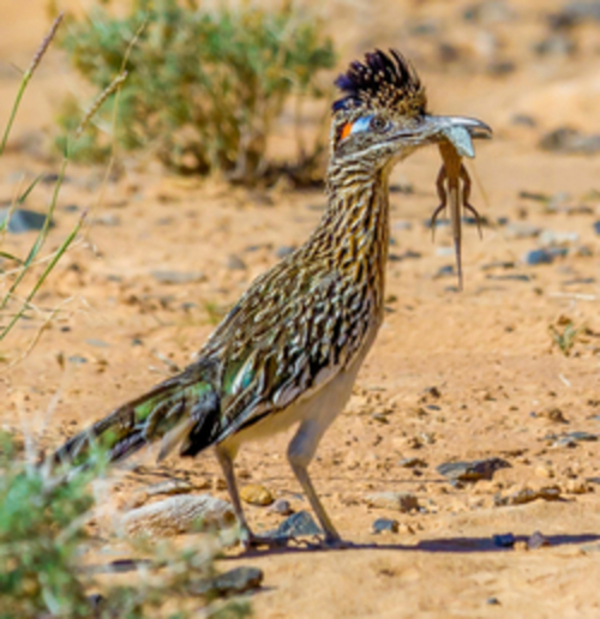

In [31]:
# Example 11: Download an open an image file

%matplotlib inline
from PIL import Image
import requests
from io import BytesIO

# Specify the url for the data
url = "https://biologicslab.co/BIO1173/images/roadrunner.jpg"

# Use the requests.get () function to download the image
response = requests.get(url)

# Use Image.open to open the image
Roadrunner_img = Image.open(BytesIO(response.content))

# Display the image in Jupyter Lab
Roadrunner_img

You should see a color picture of a roadrunner (_Geococcyx californianus_).

### **Exercise 11: Download and open an image file**

In the cell below, download an image of showing an artist's dipiction of the Cambrian ocean located at the URL:"https://biologicslab.co/BIO1173/images/cambrian.jpg". Call your image `Cambrian_img`.

Open `Cambrian_img` and display it in your notebook.


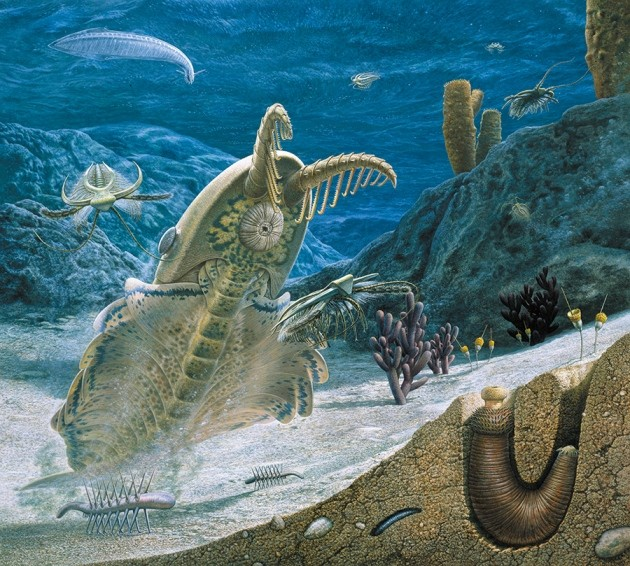

In [ ]:
# Insert your code for Exercise 11 here


%matplotlib inline
from PIL import Image
import requests
from io import BytesIO

# Specify the url for the data
url = "https://biologicslab.co/BIO1173/images/cambrian.jpg"

# Use the requests.get () function to download the image
response = requests.get(url)

# Use Image.open to open the image
Cambrian_img = Image.open(BytesIO(response.content))

# Display the image in Jupyter Lab
Cambrian_img

If your code is correct you should see an artist's recreation of a [Cambrian ocean](https://en.wikipedia.org/wiki/Cambrian_explosion) about 541 million years ago. The largest animal is called [Anomalocaris](https://en.wikipedia.org/wiki/Anomalocaris).

## **Lesson Turn-in**

When you have completed and run all of the code cells, use the **File --> Print.. --> Save to PDF** to generate a PDF of your Colab notebook. Save your PDF as `Class_01_6.lastname.pdf` where _lastname_ is your last name, and upload the file to Canvas.

---------------------------------------

## **Lizard Tail**


## **History of Artificial Neural Networks**


**Artificial neural networks (ANNs)** are models created using machine learning to perform a number of tasks. Their creation was inspired by biological neural circuitry.[1][a] While some of the computational implementations ANNs relate to earlier discoveries in mathematics, the first implementation of ANNs was by psychologist Frank Rosenblatt, who developed the perceptron. Little research was conducted on ANNs in the 1970s and 1980s, with the AAAI calling this period an "AI winter".

Later, advances in hardware and the development of the backpropagation algorithm, as well as recurrent neural networks and convolutional neural networks, renewed interest in ANNs. The 2010s saw the development of a deep neural network (i.e., one with many layers) called AlexNet. It greatly outperformed other image recognition models, and is thought to have launched the ongoing AI spring, and further increasing interest in deep learning. The transformer architecture was first described in 2017 as a method to teach ANNs grammatical dependencies in language, and is the predominant architecture used by large language models such as GPT-4. Diffusion models were first described in 2015, and became the basis of image generation models such as DALL-E in the 2020s

* **Perceptrons and other early neural networks**

The simplest feedforward network consists of a single weight layer without activation functions. It would be just a linear map, and training it would be linear regression. Linear regression by least squares method was used by Adrien-Marie Legendre (1805) and Carl Friedrich Gauss (1795) for the prediction of planetary movement.

A logical calculus of the ideas immanent in nervous activity (Warren McCulloch and Walter Pitts, 1943) studied several abstract models for neural networks using symbolic logic of Rudolf Carnap and Principia Mathematica. The paper argued that several abstract models of neural networks (some learning, some not learning) have the same computational power as Turing machines. This model paved the way for research to split into two approaches. One approach focused on biological processes while the other focused on the application of neural networks to artificial intelligence. This work led to work on nerve networks and their link to finite automata.

In the early 1940s, D. O. Hebb created a learning hypothesis based on the mechanism of neural plasticity that became known as Hebbian learning. Hebbian learning is unsupervised learning. This evolved into models for long-term potentiation. Researchers started applying these ideas to computational models in 1948 with Turing's B-type machines. B. Farley and Wesley A. Clark (1954) first used computational machines, then called "calculators", to simulate a Hebbian network. Other neural network computational machines were created by Rochester, Holland, Habit and Duda (1956).

Frank Rosenblatt (1958) created the perceptron, an algorithm for pattern recognition. A multilayer perceptron (MLP) comprised 3 layers: an input layer, a hidden layer with randomized weights that did not learn, and an output layer. With mathematical notation, Rosenblatt described circuitry not in the basic perceptron, such as the exclusive-or circuit that could not be processed by neural networks at the time. In 1959, a biological model proposed by Nobel laureates Hubel and Wiesel was based on their discovery of two types of cells in the primary visual cortex: simple cells and complex cells. He later published a 1962 book also introduced variants and computer experiments, including a version with four-layer perceptrons where the last two layers have learned weights (and thus a proper multilayer perceptron).[16]: section 16 Some consider that the 1962 book developed and explored all of the basic ingredients of the deep learning systems of today.

Some say that research stagnated following Marvin Minsky and Papert Perceptrons (1969).

Group method of data handling, a method to train arbitrarily deep neural networks was published by Alexey Ivakhnenko and Lapa in 1967, which they regarded as a form of polynomial regression, or a generalization of Rosenblatt's perceptron. A 1971 paper described a deep network with eight layers trained by this method.

The first deep learning multilayer perceptron trained by stochastic gradient descent was published in 1967 by Shun'ichi Amari. In computer experiments conducted by Amari's student Saito, a five layer MLP with two modifiable layers learned internal representations to classify non-linearily separable pattern classes. Subsequent developments in hardware and hyperparameter tunings have made end-to-end stochastic gradient descent the currently dominant training technique.

* **Backpropagation**

**Backpropagation** is an efficient application of the chain rule derived by Gottfried Wilhelm Leibniz in 1673 to networks of differentiable nodes. The terminology "back-propagating errors" was actually introduced in 1962 by Rosenblatt, but he did not know how to implement this, although Henry J. Kelley had a continuous precursor of backpropagation in 1960 in the context of control theory. The modern form of backpropagation was developed multiple times in early 1970s. The earliest published instance was Seppo Linnainmaa's master thesis (1970). Paul Werbos developed it independently in 1971, but had difficulty publishing it until 1982. In 1986, David E. Rumelhart et al. popularized backpropagation.

* **Recurrent network architectures (RNN)**

One origin of RNN was statistical mechanics. The Ising model was developed by Wilhelm Lenz and Ernst Ising in the 1920s as a simple statistical mechanical model of magnets at equilibrium. Glauber in 1963 studied the Ising model evolving in time, as a process towards equilibrium (Glauber dynamics), adding in the component of time. Shun'ichi Amari in 1972 proposed to modify the weights of an Ising model by Hebbian learning rule as a model of associative memory, adding in the component of learning.[36] This was popularized as the Hopfield network (1982).

Another origin of RNN was neuroscience. The word "recurrent" is used to describe loop-like structures in anatomy. In 1901, Cajal observed "recurrent semicircles" in the cerebellar cortex. In 1933, Lorente de Nó discovered "recurrent, reciprocal connections" by Golgi's method, and proposed that excitatory loops explain certain aspects of the vestibulo-ocular reflex. Hebb considered "reverberating circuit" as an explanation for short-term memory. (McCulloch & Pitts 1943) considered neural networks that contains cycles, and noted that the current activity of such networks can be affected by activity indefinitely far in the past.

Two early influential works were the Jordan network (1986) and the Elman network (1990), which applied RNN to study cognitive psychology. In 1993, a neural history compressor system solved a "Very Deep Learning" task that required more than 1000 subsequent layers in an RNN unfolded in time.

* **LSTM**

Sepp Hochreiter's diploma thesis (1991) proposed the neural history compressor, and identified and analyzed the vanishing gradient problem. In 1993, a neural history compressor system solved a "Very Deep Learning" task that required more than 1000 subsequent layers in an RNN unfolded in time. Hochreiter proposed recurrent residual connections to solve the vanishing gradient problem. This led to the long short-term memory (LSTM), published in 1995. LSTM can learn "very deep learning" tasks with long credit assignment paths that require memories of events that happened thousands of discrete time steps before. That LSTM was not yet the modern architecture, which required a "forget gate", introduced in 1999, which became the standard RNN architecture.

**Long short-term memory (LSTM)** networks were invented by Hochreiter and Schmidhuber in 1995 and set accuracy records in multiple applications domains. It became the default choice for RNN architecture.

Around 2006, LSTM started to revolutionize speech recognition, outperforming traditional models in certain speech applications. LSTM also improved large-vocabulary speech recognition[52][53] and text-to-speech synthesis and was used in Google voice search, and dictation on Android devices.

LSTM broke records for improved machine translation, language modeling and Multilingual Language Processing. LSTM combined with convolutional neural networks (CNNs) improved automatic image captioning.

* **Convolutional neural networks (CNNs)**

The origin of the CNN architecture is the "neocognitron" introduced by Kunihiko Fukushima in 1980. It was inspired by work of Hubel and Wiesel in the 1950s and 1960s which showed that cat visual cortices contain neurons that individually respond to small regions of the visual field. The neocognitron introduced the two basic types of layers in CNNs: convolutional layers, and downsampling layers. A convolutional layer contains units whose receptive fields cover a patch of the previous layer. The weight vector (the set of adaptive parameters) of such a unit is often called a filter. Units can share filters. Downsampling layers contain units whose receptive fields cover patches of previous convolutional layers. Such a unit typically computes the average of the activations of the units in its patch. This downsampling helps to correctly classify objects in visual scenes even when the objects are shifted.

In 1969, Kunihiko Fukushima also introduced the ReLU (rectified linear unit) activation function. The rectifier has become the most popular activation function for CNNs and deep neural networks in general.

The time delay neural network (TDNN) was introduced in 1987 by Alex Waibel and was one of the first CNNs, as it achieved shift invariance. It did so by utilizing weight sharing in combination with backpropagation training. Thus, while also using a pyramidal structure as in the neocognitron, it performed a global optimization of the weights instead of a local one.

In 1988, Wei Zhang et al. applied backpropagation to a CNN (a simplified Neocognitron with convolutional interconnections between the image feature layers and the last fully connected layer) for alphabet recognition. They also proposed an implementation of the CNN with an optical computing system.

Kunihiko Fukushima published the neocognitron in 1980. Max pooling appears in a 1982 publication on the neocognitron. In 1989, Yann LeCun et al. trained a CNN with the purpose of recognizing handwritten ZIP codes on mail. While the algorithm worked, training required 3 days. It used max pooling. Learning was fully automatic, performed better than manual coefficient design, and was suited to a broader range of image recognition problems and image types. Subsequently, Wei Zhang, et al. modified their model by removing the last fully connected layer and applied it for medical image object segmentation in 1991 and breast cancer detection in mammograms in 1994.

In a variant of the neocognitron called the cresceptron, instead of using Fukushima's spatial averaging, J. Weng et al. also used max-pooling where a downsampling unit computes the maximum of the activations of the units in its patch.

LeNet-5, a 7-level CNN by Yann LeCun et al. in 1998, that classifies digits, was applied by several banks to recognize hand-written numbers on checks (British English: cheques) digitized in 32x32 pixel images. The ability to process higher-resolution images requires larger and more layers of CNNs, so this technique is constrained by the availability of computing resources.

In 2010, Backpropagation training through max-pooling was accelerated by GPUs and shown to perform better than other pooling variants. Behnke (2003) relied only on the sign of the gradient (Rprop) on problems such as image reconstruction and face localization. Rprop is a first-order optimization algorithm created by Martin Riedmiller and Heinrich Braun in 1992.

* **Deep learning**

The deep learning revolution started around CNN- and GPU-based computer vision.

Although CNNs trained by backpropagation had been around for decades and GPU implementations of NNs for years, including CNNs, faster implementations of CNNs on GPUs were needed to progress on computer vision. Later, as deep learning becomes widespread, specialized hardware and algorithm optimizations were developed specifically for deep learning.

A key advance for the deep learning revolution was hardware advances, especially GPU. Some early work dated back to 2004. In 2009, Raina, Madhavan, and Andrew Ng reported a 100M deep belief network trained on 30 Nvidia GeForce GTX 280 GPUs, an early demonstration of GPU-based deep learning. They reported up to 70 times faster training.

In 2011, a CNN named DanNet by Dan Ciresan, Ueli Meier, Jonathan Masci, Luca Maria Gambardella, and Jürgen Schmidhuber achieved for the first time superhuman performance in a visual pattern recognition contest, outperforming traditional methods by a factor of 3. It then won more contests. They also showed how max-pooling CNNs on GPU improved performance significantly.

Many discoveries were empirical and focused on engineering. For example, in 2011, Xavier Glorot, Antoine Bordes and Yoshua Bengio found that the ReLU worked better than widely used activation functions prior to 2011.

In October 2012, AlexNet by Alex Krizhevsky, Ilya Sutskever, and Geoffrey Hinton won the large-scale ImageNet competition by a significant margin over shallow machine learning methods. Further incremental improvements included the VGG-16 network by Karen Simonyan and Andrew Zisserman and Google's Inceptionv3.

The success in image classification was then extended to the more challenging task of generating descriptions (captions) for images, often as a combination of CNNs and LSTMs.

In 2014, the state of the art was training “very deep neural network” with 20 to 30 layers. Stacking too many layers led to a steep reduction in training accuracy, known as the "degradation" problem. In 2015, two techniques were developed concurrently to train very deep networks: highway network and residual neural network (ResNet). The ResNet research team attempted to train deeper ones by empirically testing various tricks for training deeper networks until they discovered the deep residual network architecture.

* **Generative adversarial networks**

In 1991, Juergen Schmidhuber published "artificial curiosity", neural networks in a zero-sum game.[105] The first network is a generative model that models a probability distribution over output patterns. The second network learns by gradient descent to predict the reactions of the environment to these patterns. GANs can be regarded as a case where the environmental reaction is 1 or 0 depending on whether the first network's output is in a given set. It was extended to "predictability minimization" to create disentangled representations of input patterns.

Other people had similar ideas but did not develop them similarly. An idea involving adversarial networks was published in a 2010 blog post by Olli Niemitalo.[109] This idea was never implemented and did not involve stochasticity in the generator and thus was not a generative model. It is now known as a conditional GAN or cGAN. An idea similar to GANs was used to model animal behavior by Li, Gauci and Gross in 2013.

Another inspiration for GANs was noise-contrastive estimation, which uses the same loss function as GANs and which Goodfellow studied during his PhD in 2010–2014.

Generative adversarial network (GAN) by (Ian Goodfellow et al., 2014) became state of the art in generative modeling during 2014-2018 period. Excellent image quality is achieved by Nvidia's StyleGAN (2018) based on the Progressive GAN by Tero Karras et al. Here the GAN generator is grown from small to large scale in a pyramidal fashion. Image generation by GAN reached popular success, and provoked discussions concerning deepfakes. Diffusion models (2015) eclipsed GANs in generative modeling since then, with systems such as DALL·E 2 (2022) and Stable Diffusion (2022).

* **Attention mechanism and Transformer**

The human selective attention had been studied in neuroscience and cognitive psychology. Selective attention of audition was studied in the cocktail party effect (Colin Cherry, 1953). (Donald Broadbent, 1958) proposed the filter model of attention. Selective attention of vision was studied in the 1960s by George Sperling's partial report paradigm. It was also noticed that saccade control is modulated by cognitive processes, in that the eye moves preferentially towards areas of high salience. As the fovea of the eye is small, the eye cannot sharply resolve all of the visual field at once. The use of saccade control allows the eye to quickly scan important features of a scene.

These researches inspired algorithms, such as a variant of the Neocognitron.Conversely, developments in neural networks had inspired circuit models of biological visual attention.

A key aspect of attention mechanism is the use of multiplicative operations, which had been studied under the names of higher-order neural networks,multiplication units, sigma-pi units, fast weight controllers, and hyper-networks.

* **Recurrent attention**

During the deep learning era, attention mechanism was developed solve similar problems in encoding-decoding.

The idea of encoder-decoder sequence transduction had been developed in the early 2010s. The papers most commonly cited as the originators that produced seq2seq are two papers from 2014. A seq2seq architecture employs two RNN, typically LSTM, an "encoder" and a "decoder", for sequence transduction, such as machine translation. They became state of the art in machine translation, and was instrumental in the development of attention mechanism and Transformer.

An image captioning model was proposed in 2015, citing inspiration from the seq2seq model that would encode an input image into a fixed-length vector. (Xu et al. 2015), citing (Bahdanau et al. 2014), applied the attention mechanism as used in the seq2seq model to image captioning.

* **Transformer**

One problem with seq2seq models was their use of recurrent neural networks, which are not parallelizable as both the encoder and the decoder processes the sequence token-by-token. The decomposable attention attempted to solve this problem by processing the input sequence in parallel, before computing a "soft alignment matrix" ("alignment" is the terminology used by (Bahdanau et al. 2014). This allowed parallel processing.

The idea of using attention mechanism for self-attention, instead of in an encoder-decoder (cross-attention), was also proposed during this period, such as in differentiable neural computers and neural Turing machines. It was termed intra-attention where an LSTM is augmented with a memory network as it encodes an input sequence.

These strands of development were combined in the Transformer architecture, published in Attention Is All You Need (2017). Subsequently, attention mechanisms were extended within the framework of Transformer architecture.

Seq2seq models with attention still suffered from the same issue with recurrent networks, which is that they are hard to parallelize, which prevented them to be accelerated on GPUs. In 2016, decomposable attention applied attention mechanism to the feedforward network, which are easy to parallelize.[139] One of its authors, Jakob Uszkoreit, suspected that attention without recurrence is sufficient for language translation, thus the title "attention is all you need".

In 2017, the original (100M-sized) encoder-decoder transformer model was proposed in the "Attention is all you need" paper. At the time, the focus of the research was on improving seq2seq for machine translation, by removing its recurrence to processes all tokens in parallel, but preserving its dot-product attention mechanism to keep its text processing performance. Its parallelizability was an important factor to its widespread use in large neural networks.